#📚 Compreendendo a Dependência entre Amostras

Antes de escolher o teste de hipótese, é essencial entender se as amostras são independentes ou dependentes, pois isso muda totalmente o procedimento estatístico.

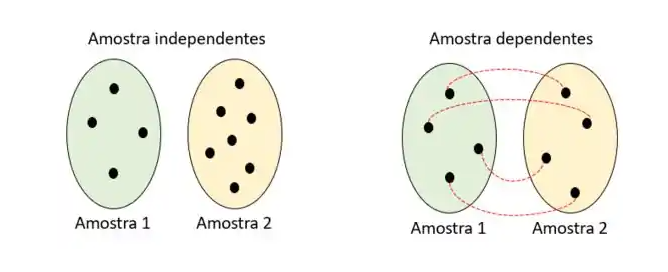

🔹 Amostras Independentes

São selecionadas de forma separada, de duas populações diferentes. Nenhum indivíduo da amostra 1 aparece na amostra 2

Exemplo: Comparar a pressão arterial de pacientes do Hospital A com a de pacientes do Hospital B

🔸 Amostras Dependentes (ou pareadas)

Cada elemento da amostra 1 tem correspondência direta com um da amostra 2. Também chamadas de amostras emparelhadas

Exemplo: Medir o peso de estudantes antes e depois de um ano letivo. Medir níveis de colesterol de pacientes antes e após tratamento. A dependência vem do fato de que as observações “antes” e “depois” pertencem ao mesmo indivíduo → isso exige um modelo estatístico que considere essa conexão.

# 📚 Desvio Padrão Conhecido ou Desconhecido

Ao aplicar qualquer teste para comparar médias, devemos considerar se o desvio padrão populacional (σ) é conhecido ou não. Isso determina o tipo de teste que utilizamos:

# ✅ Desvio padrão populacional conhecido

Situação rara (ocorre mais em controle industrial ou com dados históricos confiáveis). Exige que a distribuição das diferenças entre pares seja normal ou n ≥ 30. Usamos o teste z (z-test).

**Fórmula para o teste z (pareado):**

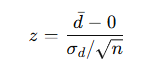

**🎯 Cenário:**

Medimos a pressão de 40 pacientes antes e depois de um novo tratamento. O desvio padrão populacional das diferenças é conhecido (σ = 3 mmHg)

In [17]:
import pandas as pd
import numpy as np

# Simulação de amostras pareadas (antes e depois) para 40 pacientes
np.random.seed(42)

# Pressão antes do tratamento (média ≈ 145 mmHg)
pressao_antes = np.random.normal(loc=145, scale=3, size=40)

# Diferença média esperada após tratamento: redução ≈ 5 mmHg
# σ populacional será tratado como conhecido no primeiro exemplo, e desconhecido no segundo
diferencas = np.random.normal(loc=5, scale=3, size=40)

# Pressão após o tratamento
pressao_depois = pressao_antes - diferencas

# Criar DataFrame
df_dependente = pd.DataFrame({
    "Paciente": range(1, 41),
    "Pressao_Antes": pressao_antes,
    "Pressao_Depois": pressao_depois,
    "Diferenca": pressao_antes - pressao_depois
})

In [18]:
df_dependente

,Paciente,Pressao_Antes,Pressao_Depois,Diferenca
0,1,146.490142,139.274743,7.215400
1,2,144.585207,139.071102,5.514105
2,3,146.943066,142.290010,4.653055
3,4,149.569090,145.472401,4.096689
4,5,144.297540,143.733106,0.564434
5,6,144.297589,141.457122,2.840467
6,7,149.737638,146.119555,3.618084
7,8,147.302304,139.130938,8.171367
8,9,143.591577,137.560722,6.030855
9,10,146.627680,146.916801,-0.289120


#### 🧪 Especifique as Hipóteses

Desejamos avaliar se houve redução significativa da pressão arterial após o uso de um novo medicamento.

* H₀ (Hipótese nula): μ_diferença = 0 (sem mudança média)
* H₁ (Hipótese alternativa): μ_diferença > 0 (houve redução → diferença positiva)

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [25]:
alpha = 0.05  # 5%

####🧮 Passo 3 – Escolha o Teste Adequado

* Temos amostras dependentes (antes e depois nos mesmos pacientes)
* O desvio padrão populacional das diferenças é conhecido (σ = 3 mmHg)
* Como estamos assumindo que o desvio padrão populacional é conhecido e n > 30, usamos o teste Z para diferenças pareadas.

➡️ Aplicamos o teste Z pareado

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

Para o primeiro caso (teste Z para uma média com desvio padrão populacional conhecido), não existe uma função direta e pronta no scipy.stats, por isso iremos calcular manualmente, como tínhamos feito até então

In [21]:
from scipy.stats import norm
import matplotlib.pyplot as plt

In [19]:
diferencas = df_dependente["Diferenca"]
media_dif = np.mean(diferencas)
n = len(diferencas)
sigma_pop = 3  # desvio padrão populacional conhecido

In [23]:
z = (media_dif - 0) / (sigma_pop / np.sqrt(n))
p_valor = 1 - norm.cdf(z)  # unilateral à direita

print(z, p_valor)

10.357238533801167 0.0


In [9]:
import matplotlib.pyplot as plt

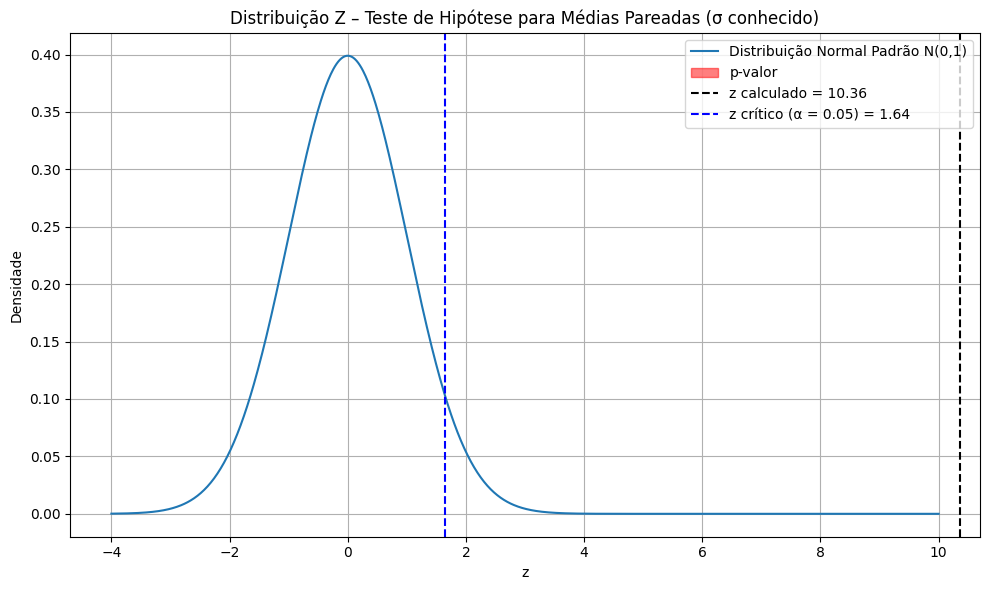

In [26]:
# Gráfico
x = np.linspace(-4, 10, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label="Distribuição Normal Padrão N(0,1)")
ax.fill_between(x, 0, y, where=(x >= z), color="red", alpha=0.5, label="p-valor")
ax.axvline(z, color="black", linestyle="--", label=f"z calculado = {z:.2f}")
ax.axvline(norm.ppf(1 - alpha), color="blue", linestyle="--", label=f"z crítico (α = {alpha}) = {norm.ppf(1 - alpha):.2f}")
ax.set_title("Distribuição Z – Teste de Hipótese para Médias Pareadas (σ conhecido)")
ax.set_xlabel("z")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()



####📈 Passo 5 – Interprete os Resultados

* Como z é maior que o z crítico
* E p < 0.05, rejeitamos H₀

**Conclusão Prática (em saúde):** Há forte evidência estatística de que o tratamento reduziu a pressão arterial dos pacientes, com base em dados pareados e considerando um desvio padrão populacional conhecido.

#🚫 Desvio padrão populacional desconhecido

Situação comum na saúde, educação, ciências sociais, etc. Usamos o teste t pareado (ttest_rel do scipy.stats). O desvio padrão é estimado a partir da amostra

**Fórmula para o teste t (pareado):**

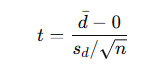

* d = diferença das médias
* sd = desvio padrão amostral das diferenças
* n = número de pares

**🎯 Cenário:**

Vamos agora aplicar os 5 passos do teste de hipótese ao cenário onde o desvio padrão populacional é desconhecido, usando um teste t pareado com n = 40:

#### 🧪 Especifique as Hipóteses

Queremos saber se houve redução significativa da pressão arterial após uma intervenção em 40 pacientes.
* H₀: μ_diferença = 0
* H₁: μ_diferença > 0

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [27]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

* Amostras dependentes (pareadas)
* Desvio padrão populacional é desconhecido
* n = 40 pares

➡️ Usamos o teste t para uma amostra de diferenças pareadas

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [15]:
from scipy.stats import t

In [28]:
diferencas = df_dependente["Diferenca"]
n = len(diferencas)
gl = n - 1

In [33]:
# Aplicar o teste t (H0: média das diferenças = 0)
t_stat, p_valor = ttest_1samp(diferencas, popmean=0)
t_stat, p_valor

(np.float64(10.735474909677732), np.float64(3.3017547342471114e-13))

In [32]:
# Valor crítico para teste unilateral à direita
t_critico = t.ppf(1 - alpha, df=gl)
t_critico

np.float64(1.6848751217112248)

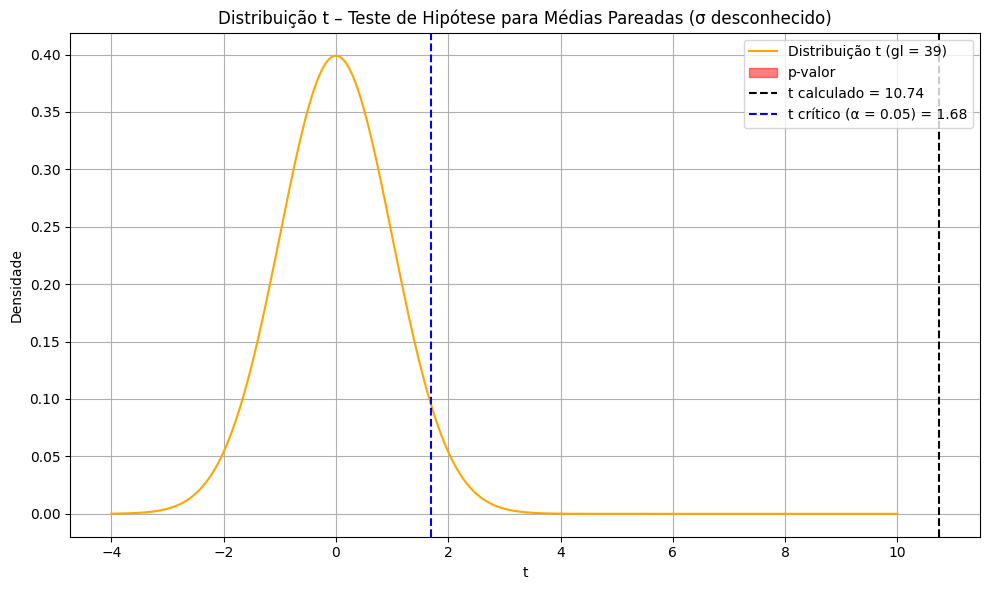

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=f"Distribuição t (gl = {gl})", color="orange")
ax.fill_between(x, 0, y, where=(x >= t_stat), color="red", alpha=0.5, label="p-valor")
ax.axvline(t_stat, color="black", linestyle="--", label=f"t calculado = {t_stat:.2f}")
ax.axvline(t_critico, color="blue", linestyle="--", label=f"t crítico (α = {alpha}) = {t_critico:.2f}")
ax.set_title("Distribuição t – Teste de Hipótese para Médias Pareadas (σ desconhecido)")
ax.set_xlabel("t")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

* Como t > t crítico e p < α, rejeitamos H₀

**Conclusão Prática (em saúde):** Há forte evidência estatística de que o tratamento reduziu a pressão arterial dos pacientes